<a href="https://colab.research.google.com/github/jyjoon001/CSW4020/blob/main/CSW4020_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 중간고사 대비용 Jupyter Notebook

In [ ]:
import nltk
import re
nltk.download('book')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('gutenberg')
nltk.download('words')
from nltk.book import *
from nltk.corpus import brown
from nltk.corpus import stopwords
from nltk.corpus import gutenberg
from nltk.corpus import inaugural
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus.reader.plaintext import CategorizedPlaintextCorpusReader
names = nltk.corpus.names

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CSW4020

Mounted at /content/drive
/content/drive/MyDrive/CSW4020


#정보처리및자연어처리 1차과제
> 20161482 박준용

##1번: 배점 1점

현재 작업 폴더 밑 Q1 폴더의 16개 파일을 불러와서 다음의 결과를 얻을 수 있도록 변수 a를 있도록 한 줄 코드로 만드시오. (주의: categories의 출력값을 Q1 폴더 파일명으로부터 추출해야 함.)

In [ ]:
# 1번
a = CategorizedPlaintextCorpusReader('./Q1','.*', cat_pattern='\D+[a-z](.+)[.]') 

In [ ]:
a.categories()

['HUMANITIES', 'NATSCIENCE', 'SOCSCIENCE', 'TECH']

In [ ]:
len(a.fileids())

16

In [ ]:
print(a.fileids())

['CANacademicHUMANITIES.txt', 'CANacademicNATSCIENCE.txt', 'CANacademicSOCSCIENCE.txt', 'CANacademicTECH.txt', 'CANpopularHUMANITIES.txt', 'CANpopularNATSCIENCE.txt', 'CANpopularSOCSCIENCE.txt', 'CANpopularTECH.txt', 'NZacademicHUMANITIES.txt', 'NZacademicNATSCIENCE.txt', 'NZacademicSOCSCIENCE.txt', 'NZacademicTECH.txt', 'NZpopularHUMANITIES.txt', 'NZpopularNATSCIENCE.txt', 'NZpopularSOCSCIENCE.txt', 'NZpopularTECH.txt']


##2번: 배점 1점

현재 작업 폴더 밑 Q2 폴더의 4개 파일을 불러와서 다음의 결과를 얻을 수 있도록 변수 b를 구성하도록 한 줄 코드로 만드시오. 

In [ ]:
# 2번
b = PlaintextCorpusReader('./Q2','.*') 

In [ ]:
b.fileids()

['HUMANITIES.txt', 'NATSCIENCE.txt', 'SOCSCIENCE.txt', 'TECH.txt']

##3번: 배점 2점

2번의 변수 b와 for 구문을 이용하여 다음을 수행(코드라인 수 제한 없음) 

* 파일별 문자수 = 공백문자 및 문장부호 제외 문자수 
* 파일별 어휘수 = 알파벳 또는 숫자문자 하나 이상 포함 어휘수 
* 아래의 서식을 참고하여 함수 print를 이용하여 출력

In [ ]:
# 3번
for fileid in b.fileids():
    num_chars = len(re.sub('[^a-z0-9]','',b.raw(fileid), flags=re.I))
    num_words = len([w for w in b.words(fileid) if re.search('[a-z0-9]',w, flags=re.I)])
    print('파일명: {0:<15} 문자수: {1:<10,} 어휘수: {2:<10,}'.format(fileid, num_chars, num_words)) 

파일명: HUMANITIES.txt  문자수: 530,867    어휘수: 110,177   
파일명: NATSCIENCE.txt  문자수: 538,039    어휘수: 110,008   
파일명: SOCSCIENCE.txt  문자수: 566,873    어휘수: 115,451   
파일명: TECH.txt        문자수: 530,235    어휘수: 106,654   


## 4번: 배점 2점
2번의 변수 b를 이용하여 빈도 3,000 이상의 문장부호를 빈도 내림차순으로 정렬하여 다음과 같은 변수 c 를 출력 하는 한 줄 코드를 작성하시오.

In [ ]:
# 4번
c = sorted([w for w in nltk.FreqDist(b.raw()).items() if w[0].isalpha()==False and w[0].isdigit()==False and w[0].isspace()==False and nltk.FreqDist(b.raw())[w[0]] > 3000], key=lambda tup:(-tup[1], tup[0]))

In [ ]:
len(c)

7

In [ ]:
print(c)

[(',', 22634), ('.', 21953), ('-', 6226), ("'", 4888), (')', 3703), ('(', 3694), ('"', 3095)]


##5번: 배점 2점

2번의 변수 b, 4번의 변수 c, nltk의 tabulate 함수를 이용하여 다음과 같은 파일별 변수 c의 문장부호 빈도교차표를 출력하기 위한 코드를 제시하시오.(코드 라인 수 제한 없음)

In [ ]:
# 5번
cfd = nltk.ConditionalFreqDist((genre,word)
for genre in b.fileids()
for word in b.raw(genre))
cfd.tabulate(conditions=b.fileids(), samples=[c[i][0] for i in range(len(c))])

                  ,    .    -    '    )    (    " 
HUMANITIES.txt 5770 5087 1222 1640  584  584  877 
NATSCIENCE.txt 6016 6091 1567  674 1515 1515  427 
SOCSCIENCE.txt 6078 5674 1706 1845  701  701 1042 
      TECH.txt 4770 5101 1731  729  903  894  749 


## 6번: 배점 2점
2번의 변수 b와 for 구문, nltk similar을 이용하여 다음을 수행(코드라인 수 제한 없음) 
* 파일별 ‘evidence’와 분포 맥락이 어휘 목록을 추출 
* 아래와 같이 파일명을 print 함수를 이용하여 출력한 후 nltk similar를 이용하여 출력 

In [ ]:
# 6번
for fileid in b.fileids():
    print('{0}'.format(fileid))
    nltk.Text(b.words(fileid)).similar('evidence') 

HUMANITIES.txt
one those time land life workshops islands flooding way that other
death nature signs some them works loss most definition
NATSCIENCE.txt
way need two implications absence so difficult argue year application
data same form soil surface zone work association material consisting
SOCSCIENCE.txt
one time part members which areas aware much discussion method crucial
discounting history the of measure and over another not
TECH.txt
is most possible selection use all those some but uncertainty into one
i follows assumed be which mentioned many such


# 2019년 중간고사


In [ ]:
from nltk.corpus.reader.plaintext import CategorizedPlaintextCorpusReader
path = './11_data'
my = CategorizedPlaintextCorpusReader(path, '.*', cat_pattern='(\w).+')
my.fileids()

['hu01.txt',
 'hu02.txt',
 'hu03.txt',
 'hu04.txt',
 'na01.txt',
 'na02.txt',
 'na03.txt',
 'na04.txt']

In [ ]:
my.categories()

['h', 'n']

In [ ]:
a = my.sents('na01.txt')[-3:-1]
a

[['The',
  '10',
  '.',
  '3',
  '-',
  'cm',
  'observation',
  'of',
  'Sloanaker',
  'was',
  'made',
  'on',
  'May',
  '20',
  ',',
  '1958',
  ',',
  'using',
  'the',
  '84',
  '-',
  'foot',
  'reflector',
  'at',
  'the',
  'Maryland',
  'Point',
  'Observatory',
  'of',
  'the',
  'U',
  '.',
  'S',
  '.',
  'Naval',
  'Research',
  'Laboratory',
  '.'],
 ['The', 'age', 'of', 'the', 'moon', 'was', 'about', '2', 'days', '.']]

In [ ]:
b = [j for i in a for j in i if j.isalpha() is True]
len(b)

33

In [ ]:
c = [w.lower() for w in b]
len(c)

33

In [ ]:
sorted(set(c))

['about',
 'age',
 'at',
 'cm',
 'days',
 'foot',
 'laboratory',
 'made',
 'maryland',
 'may',
 'moon',
 'naval',
 'observation',
 'observatory',
 'of',
 'on',
 'point',
 'reflector',
 'research',
 's',
 'sloanaker',
 'the',
 'u',
 'using',
 'was']

In [ ]:
d = nltk.FreqDist(c).most_common(25)
d

[('the', 6),
 ('of', 3),
 ('was', 2),
 ('cm', 1),
 ('observation', 1),
 ('sloanaker', 1),
 ('made', 1),
 ('on', 1),
 ('may', 1),
 ('using', 1),
 ('foot', 1),
 ('reflector', 1),
 ('at', 1),
 ('maryland', 1),
 ('point', 1),
 ('observatory', 1),
 ('u', 1),
 ('s', 1),
 ('naval', 1),
 ('research', 1),
 ('laboratory', 1),
 ('age', 1),
 ('moon', 1),
 ('about', 1),
 ('days', 1)]

In [ ]:
sum(i[1] for i in d)

33

In [ ]:
e = ' '.join([' '.join(i) for i in a])

In [ ]:
len(e)

214

In [ ]:
e.split()

['The',
 '10',
 '.',
 '3',
 '-',
 'cm',
 'observation',
 'of',
 'Sloanaker',
 'was',
 'made',
 'on',
 'May',
 '20',
 ',',
 '1958',
 ',',
 'using',
 'the',
 '84',
 '-',
 'foot',
 'reflector',
 'at',
 'the',
 'Maryland',
 'Point',
 'Observatory',
 'of',
 'the',
 'U',
 '.',
 'S',
 '.',
 'Naval',
 'Research',
 'Laboratory',
 '.',
 'The',
 'age',
 'of',
 'the',
 'moon',
 'was',
 'about',
 '2',
 'days',
 '.']

In [ ]:
[i for i in e.split() if i.isalpha() is True]

['The',
 'cm',
 'observation',
 'of',
 'Sloanaker',
 'was',
 'made',
 'on',
 'May',
 'using',
 'the',
 'foot',
 'reflector',
 'at',
 'the',
 'Maryland',
 'Point',
 'Observatory',
 'of',
 'the',
 'U',
 'S',
 'Naval',
 'Research',
 'Laboratory',
 'The',
 'age',
 'of',
 'the',
 'moon',
 'was',
 'about',
 'days']

In [ ]:
[i for i in e.split() if i.isalpha() is False and i.isdigit() is False]

['.', '-', ',', ',', '-', '.', '.', '.', '.']

In [ ]:
tuple([i for i in e.split(' - ')[:2]])

('The 10 . 3',
 'cm observation of Sloanaker was made on May 20 , 1958 , using the 84')

# 연습문제


##Python기초
---

In [ ]:
a = '\nabc\nabc\nabc'
b = a.splitlines(True)[:2] #답안
b

['\n', 'abc\n']

In [ ]:
a = 'A:apple'
b = a.replace(':','*:*')
b

'A*:*apple'

In [ ]:
a = 'A:apple'
b = a.title().split(':')
b

['A', 'Apple']

In [ ]:
a = "I am not good at programming."
b = [i for i in a]
print(b)

['I', ' ', 'a', 'm', ' ', 'n', 'o', 't', ' ', 'g', 'o', 'o', 'd', ' ', 'a', 't', ' ', 'p', 'r', 'o', 'g', 'r', 'a', 'm', 'm', 'i', 'n', 'g', '.']


In [ ]:
a = "I am not good at programming."
b = {i for i in a}
b

{' ', '.', 'I', 'a', 'd', 'g', 'i', 'm', 'n', 'o', 'p', 'r', 't'}

In [ ]:
a = "I am not good at programming."
b = {}
for i in a:
    b[i]=a.count(i)
print(b)

{'I': 1, ' ': 5, 'a': 3, 'm': 3, 'n': 2, 'o': 4, 't': 2, 'g': 3, 'd': 1, 'p': 1, 'r': 2, 'i': 1, '.': 1}


In [ ]:
c = list(b.items())
print(c)

[('I', 1), (' ', 5), ('a', 3), ('m', 3), ('n', 2), ('o', 4), ('t', 2), ('g', 3), ('d', 1), ('p', 1), ('r', 2), ('i', 1), ('.', 1)]


In [ ]:
Female = ['Susie','Eva','Stephanie']
Male = ['Tom', 'Billy', 'Jefferson']
names = [(x, y) for x in Female for y in Male]
names

[('Susie', 'Tom'),
 ('Susie', 'Billy'),
 ('Susie', 'Jefferson'),
 ('Eva', 'Tom'),
 ('Eva', 'Billy'),
 ('Eva', 'Jefferson'),
 ('Stephanie', 'Tom'),
 ('Stephanie', 'Billy'),
 ('Stephanie', 'Jefferson')]

---

In [ ]:
re.match('[0-9a-z\t\n]+','3456abc\t\n.+?*').group() #3456abc\t\n

'3456abc\t\n'

In [ ]:
re.match('[\w\s\S]+','3456abc\t\n.+?*').group() #3456abc\t\n.+?*

'3456abc\t\n.+?*'

In [ ]:
re.match('[\d]+','3456')

<re.Match object; span=(0, 4), match='3456'>

In [ ]:
a = '''
apple 오렌지(Orange) Cherry
토마토(TOMATO) 1/3 kg'''
a

'\napple 오렌지(Orange) Cherry\n토마토(TOMATO) 1/3 kg'

In [ ]:
a.splitlines()

['', 'apple 오렌지(Orange) Cherry', '토마토(TOMATO) 1/3 kg']

In [ ]:
a.splitlines(True)

['\n', 'apple 오렌지(Orange) Cherry\n', '토마토(TOMATO) 1/3 kg']

In [ ]:
a.partition('\n')

('', '\n', 'apple 오렌지(Orange) Cherry\n토마토(TOMATO) 1/3 kg')

In [ ]:
re.match('\s(.+)\s',a).groups()

('apple 오렌지(Orange) Cherry',)

In [ ]:
re.match('\s(.+)\s(.+)',a).groups()

('apple 오렌지(Orange) Cherry', '토마토(TOMATO) 1/3 kg')

In [ ]:
re.match('\D+[(](.+)[)]\D+[(](.+)[)]',a).groups()

('Orange', 'TOMATO')

In [ ]:
a = '''홍길동\t123456-1234567
김영희\t0123450123456
'''

In [ ]:
re.findall('(\w.+)\s+(\d.+[-]\d.+)\s(\w.+)\s+(\d.+)',a)

[('홍길동', '123456-1234567', '김영희', '0123450123456')]

In [ ]:
print([x+'-'+y for x,y in re.findall('(\d{6})[-]?(\d{7})',a)])

['123456-1234567', '012345-0123456']


In [ ]:
a = '<a href="in.html">HERE<a href="out.html">'
a

'<a href="in.html">HERE<a href="out.html">'

In [ ]:
re.findall('href="(.*?)"',a) #['in.html','out.html'] (최단 일치)

['in.html', 'out.html']

In [ ]:
re.findall('href=".*"',a) #['href="in.html">HERE<a href="out.html"'] (최장 일치)

['href="in.html">HERE<a href="out.html"']

In [ ]:
re.findall('\w+', a)

['a', 'href', 'in', 'html', 'HERE', 'a', 'href', 'out', 'html']

In [ ]:
re.findall('\\b.+\\b', '\t\n123\n\tabc\n\n\n') #[123, abc]

['123', 'abc']

In [ ]:
re.findall('\\b.+\\b', '\t\n123abc\n\n\n') #[123abc]

['123abc']

In [ ]:
re.findall('\\b.+\\b', '\t\n123..abc..\n\n\n') #[123..abc] (기본:최장)

['123..abc']

In [ ]:
re.findall('\\b.', '\t123.abc.\n\n\n') #['1','.','a','.']

['1', '.', 'a', '.']

In [ ]:
re.findall('.\\b', '\t123.abc.\n\n\n') #['\t','3','.','c']

['\t', '3', '.', 'c']

In [ ]:
a='''회원 명단입니다.\nDonald Trump\t\tTrump.python@python.ac.kr\nBarrack Obama    obama@python.org\n이상입니다.'''
re.findall('\s\s+(.+[@].+)\s+',a) 
#re.findall('[A-Za-z.]+@[a-z.]+',a)

['Trump.python@python.ac.kr', 'obama@python.org']

##NLTK_코퍼스및어휘자원활용
---

In [ ]:
import random as rd
a = [len(set(j))/len(j) for j in [rd.choices(text1,k=40000) for i in range(50)]]
print('average Type/Token ratio=', round(sum(a)/len(a),3))

average Type/Token ratio= 0.166


In [ ]:
'{0:.3f}'.format(len(set(text2))/len(text2))

'0.048'

In [ ]:
def percentage(text, word):
    temp = [i.lower() for i in text]
    return 'Relative Frequency: {0:.3f}%'.format(temp.count(word)/len(temp)*100)
percentage(text2, 'the')

'Relative Frequency: 2.900%'

In [ ]:
Freq = nltk.FreqDist(text1)
'Type/Token Ratio: {0:.3f}'.format(len(Freq)/(sum(Freq.values())))

'Type/Token Ratio: 0.074'

In [ ]:
[i for i in set(text1) if len(i)>10 and Freq[i]>20]

['circumstance',
 'harpooneers',
 'considering',
 'Nevertheless',
 'Nantucketer',
 'considerable',
 'circumstances',
 'nevertheless']

In [ ]:
a = gutenberg.raw('austen-emma.txt')
len([i for i in a if i.isalpha() is True])

684327

In [ ]:
b = gutenberg.words('austen-emma.txt')
len([i for i in b if re.search('[a-z]+',i, re.I)])

161975

In [ ]:
c = gutenberg.sents('austen-emma.txt')
cc = ([[j for j in i if re.search('[a-z]',j, re.I)] for i in c])
len([i for i in cc if i != []])

7713

In [ ]:
a = [i[:2] for i in brown.fileids()]
b = nltk.FreqDist(a)

In [ ]:
for i in b: print(i,'=',b[i])

ca = 44
cb = 27
cc = 17
cd = 17
ce = 36
cf = 48
cg = 75
ch = 30
cj = 80
ck = 29
cl = 24
cm = 6
cn = 29
cp = 29
cr = 9


In [ ]:
a = nltk.Text(inaugural.words())
a.concordance('citizens')
a.similar('citizens')

Displaying 25 of 247 matches:
                                   Citizens of the Senate and of the House of 
wisest and most experienced of her citizens a distrustful scrutiny into his qu
oof of the confidence of my fellow citizens , and have thence too little consu
an my own , nor those of my fellow citizens at large less than either . No peo
hich can win the affections of its citizens and command the respect of the wor
is Government must depend . Fellow citizens , I am again called upon by the vo
frage , in common with my fellow - citizens , in the adoption or rejection of 
the Legislature , are exercised by citizens selected at regular periods by the
ited the gratitude of his fellow - citizens , commanded the highest praises of
o be more friendly to us , and our citizens to be more friendly to them ; if a
ed on the commerce of our fellow - citizens by whatever nation , and if succes
is providence . Friends and Fellow Citizens : Called upon to undertake the dut
sence of that portion 

In [ ]:
inaugural.fileids()[:3]

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt']

In [ ]:
a = [i[:4] for i in inaugural.fileids()]
a[:8]

['1789', '1793', '1797', '1801', '1805', '1809', '1813', '1817']

In [ ]:
names = nltk.corpus.names
male = names.words('male.txt')
female = names.words('female.txt')
print(f'male:{len(male):5,} vs. female:{len(female):5,}')

male:2,943 vs. female:5,001


In [ ]:
intersection = sorted(set(male).intersection(set(female)))
onlymale = sorted(set(male).difference(set(female)))

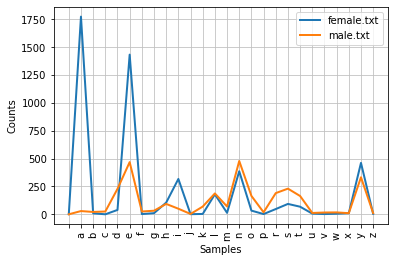

In [ ]:
a = [i[:-1] for i in names.words('male.txt')]
b = [i[:-1] for i in names.words('female.txt')]
cfd = nltk.ConditionalFreqDist(
    (fileid, w[-1])
    for fileid in names.fileids()
    for w in names.words(fileid)
)
cfd.plot()

In [ ]:
ex = CategorizedPlaintextCorpusReader('./11_data','.*', cat_pattern='\D+(.+)[.]')
ex.categories()

['01', '02', '03', '04']

In [ ]:
def content(words):
    new = [i for i in words if i.lower() not in stopwords.words('english')]
    return len(new)/len(words)

content(nltk.corpus.brown.words(categories='romance'))

0.5735054697095199

## Raw Texts
---

In [ ]:
f_name = '12_data01.txt'
a = open(f_name, encoding='utf8').read()
b = a.split()

In [ ]:
print('\n'.join(['파일명:{:>30}','공백문자제외문자수: {:18,}','어휘수: {:>30,}','공백라인제외문단수: {:18,}']
                ).format(f_name, len(''.join(b)), len(b), len(re.sub('\n{2,}','\n', a.strip()).splitlines())))

파일명:                 12_data01.txt
공백문자제외문자수:            943,476
어휘수:                        206,529
공백라인제외문단수:             18,293


In [ ]:
raw = gutenberg.raw('melville-moby_dick.txt')
fdist = nltk.FreqDist(i.lower() for i in re.findall('[a-z]', raw, re.I))
print([i for (i,_) in fdist.most_common()])

['e', 't', 'a', 'o', 'n', 'i', 's', 'h', 'r', 'l', 'd', 'u', 'm', 'c', 'w', 'f', 'g', 'p', 'b', 'y', 'v', 'k', 'q', 'j', 'x', 'z']


In [ ]:
words = nltk.corpus.words.words('en')
cfd = nltk.ConditionalFreqDist(j.lower() for i in words for j in re.findall('[kprstv][aeiou]',i, re.I))
cfd.tabulate()

      a     e     i     o     u 
k  1431  4979  2544   597   317 
p  8572 11227  6864  8768  2507 
r 23804 23956 23280 22402  3942 
s  5952 11489 12066  6008  6558 
t 14456 29443 31684 15285  4766 
v  3212 10716  4224  1545   286 







# 기타 이론사항



## 자연언어처리 역사 (P.65)





















### 인지 혁명
1950년대에는 언어학, 심리학, 인류학이 재정립되며 전산학, 신경과학의 태동의 시기이다. 

당시 이러한 새로운 trend가 생김으로서, 인간의 의식을 다룬다는 공통된 주제를 가질 수 있다는 문제 의식 하에서 생겨난 융합적 학문적 발달을 인지 혁명이라고 한다. 

이전까지 행동주의 (관찰 가능하기만 하지만 관찰 불가능한 경우를 학문에서 기피)

그러나 Chomsky (행동주의 관점에 반대 - 뇌 기반), Miller (단기기억과 관련된 인지심리학) - 가설연역적 방법을 통한 인간의 마음 연구

### 인지 과학
인간의 마음과 인공지능에서 정보처리가 어떻게 이루어지나

Chomskey: 50's 변형생성문법 (문장의 문법성을 밝힘)
-> 자연어의 문법성과 구조를 프로그래밍 언어의 문법 성과 구조를 통해 처리

--- 
### Symbolic paradigm (50's~60's)
규칙에 따라 serial하게 하나씩 처리하는 방법 (parsing algorithm)
* Major Focus: 추론에 기반한 질문 대답 (reasoning, logic)
* Minor Focus: 통계 확률
자연언어 이해 시스템 - 추론에 기반, 패턴매칭과 키워드 검색

### 언어학과 전산학 
(80's) HW, SW의 발전으로 인해서 
* 전산학의 기계의 무제한적 기억과 빠른 검색 속도를 기반 (Database)
* 문법 이론, 의미론 화용론

 -> 지식 기반 연구 (동일한 지향점)

(90's) DB의 양이 너무 방대: 시간과 비용 소모 
* 통계확률 기반으로 기계학습 이론 각광
* 실제 응용 가능한 기술 개발 요구
* Corpus (자국어 대용량 코퍼스 구축)

(00's) 4차산업혁명

기계학습기반, 인공지능과 기계번역 기술 통합

---
### 인공지능

1980년대 신경망(neural net) 이론
* 인간의 두뇌 구조에서 정보를 학습하는 기계학습 이론
* 이 이론을 적용하기에는 방대한 데이터를 관리할 방법이 없어
다시 침체기 ⇒ 1990년대 인터넷 및 하드웨어의 발전으로 부활

1990년대 기계학습 시대
* 기계학습: 기계가 수학적 최적화 및 통계분석 기법을 기반으로
데이터로부터 패턴을 학습 예측 의사 결정
* 원리보다는 구현 가능성의 시대

2010년대 Deep learning
* 2012년 6월 구글과 앤드루 응(Andrew Ng)이 신경망에 기반한
딥러닝을 이용해 1000만 개의 유튜브 동영상 속에서 고양이 이
미지를 74.8%의 정확도로 식별 성공하여 인공지능 연구의 전환
점
* 클라우드 컴퓨팅 환경과 빅데이터가 뒷받침

###기계번역

* 인공지능과 기계번역은 흥망성쇠를 같이하는 형태이다.

## NLTK 관련
symbolic and statical NLP module. 

언어학, 인지과학, 인공지능, 머신러닝 등등을 support




### Zipf 법칙
자연언어 data를 지배하는 물리적인 법칙 (randomness)

어휘(type)를 빈도 내림차순으로 나열할 때, log-log scale -1 gradient과 유사한 분포법칙이 있다. (자연, 사회 현상에서도 관측할 수 있음)

고빈도 어휘는 문법어/기능어, 1음절 어휘 (이러한 것들은 stopwords로 걸러낼 수 있음)

### Herdan/Heaps 법칙

저빈도의 어휘들이 대다수를 차지하게 되는 현상이다. (Large number of rare events (LNRE) model)

토큰수가 커질수록, 즉, 텍스트 크기가 커질수록 텍스트에 새로 출현하는 타입의 수가 상대적으로 지속 감소 (크기가 큰 텍스트일수록 type-token ratio는 작게 산출되는 경향)

텍스트 크기와 상관없이 적용가능한 표준화된 측정치로서 활용에 문제가 있다.

### 코퍼스
전산화된 문자 또는 음성 자료의 집합

* 언어 연구 목적: 대표성, 균형성, 크기를 고려함
* 코퍼스의 종류: 장르(문어/구어), 방언, 사용자 특성, 역사적 시기, 언어 학습/습득, 언어 비교
* 원문, 형태소분석, 어휘 의미, 구문분석

광의적 의미의 코퍼스
* 언어 연구 목적 외에도 다양한 목적으로 활용 가능한 전산화된 언어 자료
* 대표성, 균형성이 고려될 필요가 없다? (Web문서, Twitter, FB, 전산 텍스트 등)

통계
* 모집단(population) -> 표본(sample)
* 표본의 대표성: 균형적으로 반영
* 언어 사용의 대표성 ⇐ 균형성, 크기
* 코퍼스 구축: 장르(문어/구어), 역사적 시기, 방언, 언어 사용자 특성 변이성(variation) 고려
* 관찰 규모가 축소된 표본으로서 모집단의 특성, 즉, 언어의 보편적 특성을 관찰
* Gutenberg, Brown, Inaugural

### stopwords
* 길이 2 또는 3 이하 어휘 ⇒ 약자, a, an, in, on 등 기능어/문법어
* the, in, what 등 기능어/문법어, say, people 등 텍스트 주제어가 될 가능성이 적다고 가정되는 고빈도 어휘

정보검색, 텍스트 마이닝 등
* 데이터 분석에서 대체로 제거되는 어휘
* 연구 목적에 따라 다양한 버전의 목록 사용
* 연구 목적에 따라 제거하지 않는 경우도 있다.

## NLTK_ RawText처리


###ASCII
문자 코드: 컴퓨터에서 각 문자를 대응하는 코드 체계

미국 정보교환 표준부호, 영문 알파벳 문자 인코딩, 8bit 이진수 연쇄를 통한 알파벳, 문장부호, 제어문자 부호화

###한글 코드
조합형 코드
* 16bit = MSB + 초(5) + 중(5) + 종(5)
* 음절 모두 표현 가능

완성형 코드
* 16bit, 미리 정의된 문자 이외는 사용 불가능
* EUC-KR (기본 완성형) ~ 20%만 사용
* cp949 (확장 완성형)

###Unicode
전세계 문자를 하나의 코드 체계로 표준화한 문자코드세트 (한자, 한글, ASCII, 기호 등등) ex) UTF-8
* EUC-KR의 경우 코드번호순서와 사전 정렬순서 일치, cp949는 아님
* unicode는 한글 음절문자 11,172개를 사전정렬순에 의해 코드번호 부여

###Tokenization

어휘 단위 분리, 소문자변환, 소유격 제거, 문장부호/숫자 분리/제거 등
* 대문자가 필요할 때
* 특수문자가 사용된 단어

###분포 가설

같은 contexts 내에서 발생하고 사용되어지는 단어들은 같은 의미를 말하고 있는 경향이 있다. 

전산언어학, 인지과학 등에서 어휘 의미를 접근하는 토대

###연어(collocation)

동일 문장, 동일 맥락에서 빈번하게 함께 사용되는 어휘쌍

두 어휘의 습득은 대부분 함께 습득
* 특정 맥락, 주제와 관련
* 문화적 맥락과 관련 
* 머릿속 사전에서 연관

친숙성/빈도 효과, 촉발효과와 관련 있다. 


